### ИУ5-61Б Павловская А.А. Лаб5 ТМО

In [150]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных

In [129]:
data = pd.read_csv('archive/states_all.csv')

In [130]:
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [131]:
# Список колонок с типами данных
data.dtypes

PRIMARY_KEY                      object
STATE                            object
YEAR                              int64
ENROLL                          float64
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
OTHER_EXPENDITURE               float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_1_8_G                    float64
GRADES_9_12_G                   float64
GRADES_ALL_G                    float64
AVG_MATH_4_SCORE                float64
AVG_MATH_8_SCORE                float64
AVG_READING_4_SCORE             float64
AVG_READING_8_SCORE             float64


In [132]:
i = 0
for i in range(500,1715):
    data.drop(axis = 0,index = i, inplace = True)

In [133]:
data.shape

(500, 25)

In [134]:
# Проверка наличия пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

PRIMARY_KEY - 0
STATE - 0
YEAR - 0
ENROLL - 51
TOTAL_REVENUE - 0
FEDERAL_REVENUE - 0
STATE_REVENUE - 0
LOCAL_REVENUE - 0
TOTAL_EXPENDITURE - 0
INSTRUCTION_EXPENDITURE - 0
SUPPORT_SERVICES_EXPENDITURE - 0
OTHER_EXPENDITURE - 51
CAPITAL_OUTLAY_EXPENDITURE - 0
GRADES_PK_G - 9
GRADES_KG_G - 0
GRADES_4_G - 0
GRADES_8_G - 0
GRADES_12_G - 0
GRADES_1_8_G - 255
GRADES_9_12_G - 255
GRADES_ALL_G - 0
AVG_MATH_4_SCORE - 417
AVG_MATH_8_SCORE - 418
AVG_READING_4_SCORE - 378
AVG_READING_8_SCORE - 463


In [135]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [136]:
# Кодирование категориального признака STATE целочисленными значениями
le = LabelEncoder()
le.fit(data.STATE) 
data.STATE = le.transform(data.STATE)

In [137]:
data.drop(['YEAR','PRIMARY_KEY','AVG_MATH_4_SCORE','AVG_MATH_8_SCORE','AVG_READING_4_SCORE',
           'AVG_READING_8_SCORE','GRADES_1_8_G','GRADES_9_12_G'], axis = 1, inplace = True)
data.drop(['ENROLL','OTHER_EXPENDITURE'], axis = 1, inplace = True)

In [138]:
data.head()

,STATE,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_ALL_G
0,0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,731634.0
1,1,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,122487.0
2,2,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,673477.0
3,3,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,441490.0
4,4,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,5254844.0


In [139]:
data.dtypes

STATE                             int32
TOTAL_REVENUE                   float64
FEDERAL_REVENUE                 float64
STATE_REVENUE                   float64
LOCAL_REVENUE                   float64
TOTAL_EXPENDITURE               float64
INSTRUCTION_EXPENDITURE         float64
SUPPORT_SERVICES_EXPENDITURE    float64
CAPITAL_OUTLAY_EXPENDITURE      float64
GRADES_PK_G                     float64
GRADES_KG_G                     float64
GRADES_4_G                      float64
GRADES_8_G                      float64
GRADES_12_G                     float64
GRADES_ALL_G                    float64
dtype: object

In [140]:
from sklearn.impute import SimpleImputer

In [141]:
# Обработка пропусков GRADES_PK_G
imp_num = SimpleImputer(strategy='median')
data[['GRADES_PK_G']] = imp_num.fit_transform(data[['GRADES_PK_G']])

In [142]:
# Проверка наличия пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

STATE - 0
TOTAL_REVENUE - 0
FEDERAL_REVENUE - 0
STATE_REVENUE - 0
LOCAL_REVENUE - 0
TOTAL_EXPENDITURE - 0
INSTRUCTION_EXPENDITURE - 0
SUPPORT_SERVICES_EXPENDITURE - 0
CAPITAL_OUTLAY_EXPENDITURE - 0
GRADES_PK_G - 0
GRADES_KG_G - 0
GRADES_4_G - 0
GRADES_8_G - 0
GRADES_12_G - 0
GRADES_ALL_G - 0


In [143]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [144]:
# Масштабирование данных
sc1 = MinMaxScaler()
data[['TOTAL_REVENUE']] = sc1.fit_transform(data[['TOTAL_REVENUE']])
data[['FEDERAL_REVENUE']] = sc1.fit_transform(data[['FEDERAL_REVENUE']])
data[['STATE_REVENUE']] = sc1.fit_transform(data[['STATE_REVENUE']])
data[['LOCAL_REVENUE']] = sc1.fit_transform(data[['LOCAL_REVENUE']])
data[['TOTAL_EXPENDITURE']] = sc1.fit_transform(data[['TOTAL_EXPENDITURE']])
data[['INSTRUCTION_EXPENDITURE']] = sc1.fit_transform(data[['INSTRUCTION_EXPENDITURE']])
data[['SUPPORT_SERVICES_EXPENDITURE']] = sc1.fit_transform(data[['SUPPORT_SERVICES_EXPENDITURE']])
data[['GRADES_PK_G']] = sc1.fit_transform(data[['GRADES_PK_G']])
data[['GRADES_KG_G']] = sc1.fit_transform(data[['GRADES_KG_G']])
data[['GRADES_4_G']] = sc1.fit_transform(data[['GRADES_4_G']])
data[['GRADES_8_G']] = sc1.fit_transform(data[['GRADES_8_G']])
data[['GRADES_12_G']] = sc1.fit_transform(data[['GRADES_12_G']])
data[['GRADES_ALL_G']] = sc1.fit_transform(data[['GRADES_ALL_G']])

In [145]:
data.head()

,STATE,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_ALL_G
0,0,0.041899,0.064282,0.052878,0.039382,0.042095,0.046108,0.042543,174053.0,0.053417,0.107587,0.108659,0.119394,0.106224,0.107324
1,1,0.011055,0.017829,0.022971,0.011357,0.009512,0.008827,0.015080,37451.0,0.013138,0.010594,0.009072,0.011836,0.011400,0.008745
2,2,0.052864,0.062802,0.043660,0.089048,0.056587,0.044372,0.062038,609114.0,0.014328,0.103384,0.103463,0.099855,0.095884,0.097912
3,3,0.023594,0.034723,0.030559,0.031372,0.024444,0.026493,0.024559,145212.0,0.002381,0.060600,0.060486,0.071303,0.069024,0.060370
4,4,0.488314,0.480416,0.527381,0.432610,0.516603,0.534320,0.599167,2044688.0,0.403313,0.913149,0.853434,0.786271,0.737895,0.839321


<AxesSubplot:>

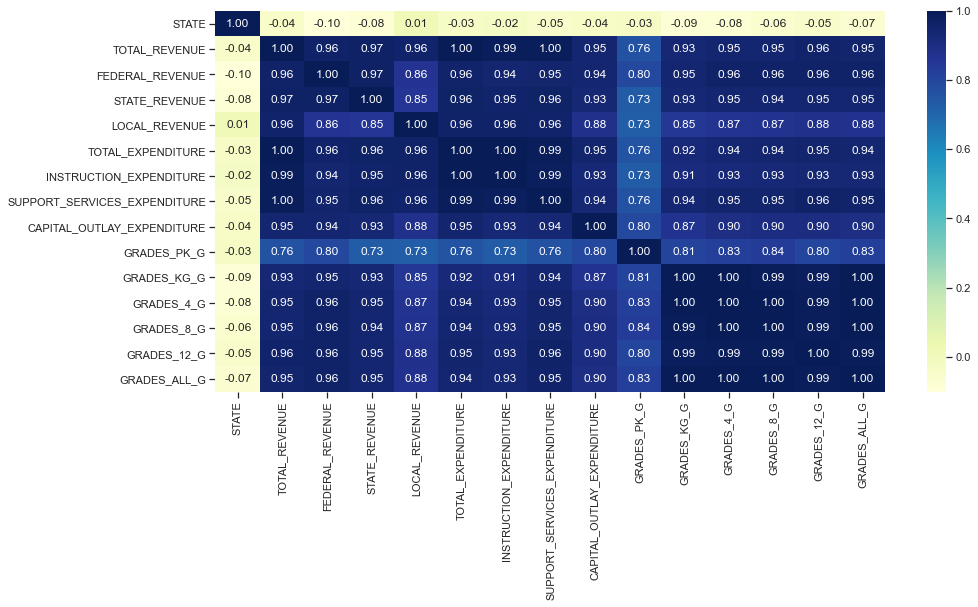

In [146]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'),cmap='YlGnBu', ax=ax, annot=True, fmt='.2f')

<AxesSubplot:xlabel='TOTAL_REVENUE', ylabel='STATE_REVENUE'>

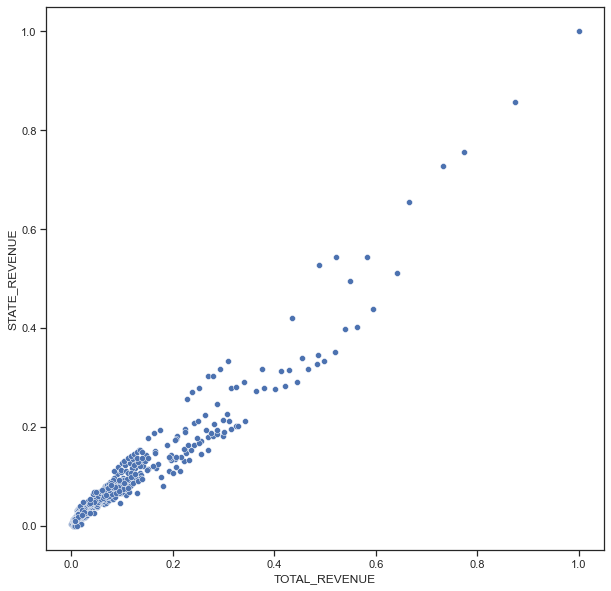

In [147]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='TOTAL_REVENUE', y='STATE_REVENUE', data=data)

Между признаком "STATE_REVENUE" и целевым признаком "TOTAL_REVENUE" практически линейная зависимость, коэффициент корреляции = 0,97


### Разделение выборки на обучающую и тестовую

In [148]:
X = data.drop(['TOTAL_REVENUE'], axis = 1)
Y = data.TOTAL_REVENUE
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    STATE  FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
0      0         0.064282       0.052878       0.039382           0.042095   
1      1         0.017829       0.022971       0.011357           0.009512   
2      2         0.062802       0.043660       0.089048           0.056587   
3      3         0.034723       0.030559       0.031372           0.024444   
4      4         0.480416       0.527381       0.432610           0.516603   

   INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
0                 0.046108                      0.042543   
1                 0.008827                      0.015080   
2                 0.044372                      0.062038   
3                 0.026493                      0.024559   
4                 0.534320                      0.599167   

   CAPITAL_OUTLAY_EXPENDITURE  GRADES_PK_G  GRADES_KG_G  GRADES_4_G  \
0                    174053.0     0.053417     0.107587    0.108659   
1         

In [149]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.1)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

      STATE  FEDERAL_REVENUE  STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  \
363      6         0.041782       0.066112       0.179159           0.092786   
170     17         0.066298       0.070723       0.054221           0.056863   
343     37         0.050512       0.070309       0.080537           0.067015   
144     42         0.073162       0.054011       0.083882           0.061623   
132     30         0.061741       0.098892       0.200987           0.121770   

     INSTRUCTION_EXPENDITURE  SUPPORT_SERVICES_EXPENDITURE  \
363                 0.104287                      0.099762   
170                 0.061608                      0.069557   
343                 0.068312                      0.083281   
144                 0.069587                      0.061206   
132                 0.123471                      0.163758   

     CAPITAL_OUTLAY_EXPENDITURE  GRADES_PK_G  GRADES_KG_G  GRADES_4_G  \
363                    300611.0   

### Случайный лес

In [151]:
forest_1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
forest_1.fit(X, Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)

In [152]:
Y_predict = forest_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict))
print('Метрика R^2 или коэффициент детерминации:',    r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 0.002027562726920487
Средняя квадратичная ошибка: 4.19603293840085e-05
Median absolute error: 0.0007854281254294406
Метрика R^2 или коэффициент детерминации: 0.9964486528417736


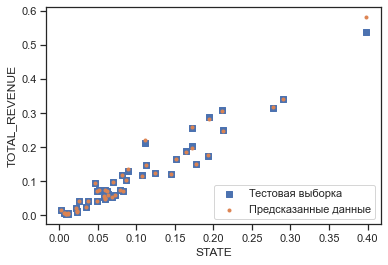

In [153]:
plt.scatter(X_test.STATE_REVENUE, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.STATE_REVENUE, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('STATE')
plt.ylabel('TOTAL_REVENUE')
plt.show()

### Бустинг

In [158]:
boosting_1 = GradientBoostingRegressor(random_state=1)
boosting_1.fit(X, Y)

GradientBoostingRegressor(random_state=1)

In [159]:
Y_predict_b = boosting_1.predict(X_test)
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_predict_b))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_predict_b))
print('Median absolute error:',       median_absolute_error(Y_test, Y_predict_b))
print('Метрика R^2 или коэффициент детерминации:',    r2_score(Y_test, Y_predict_b))

Средняя абсолютная ошибка: 0.0009614751112851863
Средняя квадратичная ошибка: 1.5041447136290992e-06
Median absolute error: 0.0008888015112001402
Метрика R^2 или коэффициент детерминации: 0.999872695468965


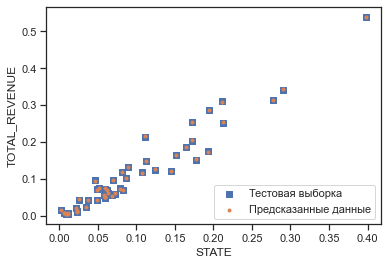

In [160]:
plt.scatter(X_test.STATE_REVENUE, Y_test,    marker = 's', label = 'Тестовая выборка')
plt.scatter(X_test.STATE_REVENUE, Y_predict_b, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('STATE')
plt.ylabel('TOTAL_REVENUE')
plt.show()